### QED-C Benchmarks - Qiskit - Hydrogen Lattice - Extras

The notebook contains additional examples specific to this benchmark program.

In [ ]:
min_qubits=2
max_qubits=8
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                   "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator
# backend_id="aqt_qasm_simulator"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }


### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Sep 10, 2023 06:12:55 UTC
Loading from width_2_instance_1.json, corresponding to 2 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.182, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.002, 0.041, 0.007 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.0, 0.0

Loading from width_4_instance_1.json, corresponding to 4 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 14, 0.267, 8.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.003, 0.059, 0.009 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.0

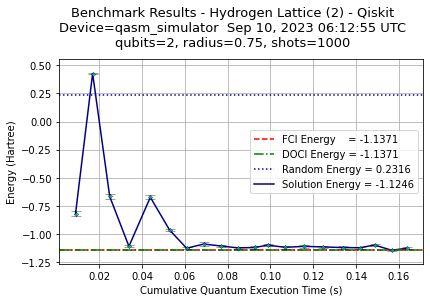

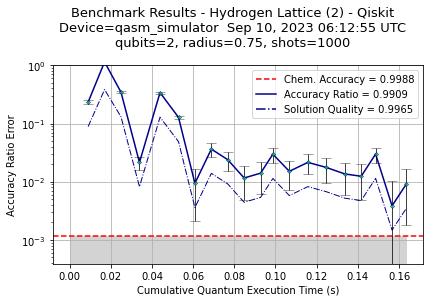

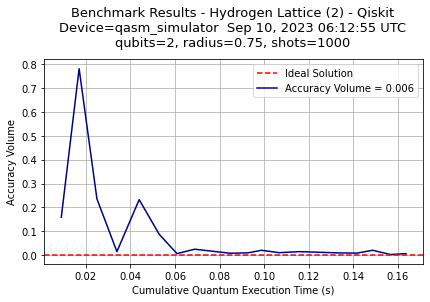

----- Line Plots for the 4 qubit group -----


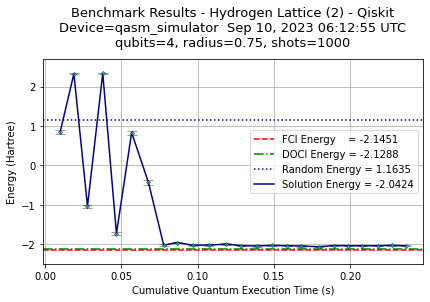

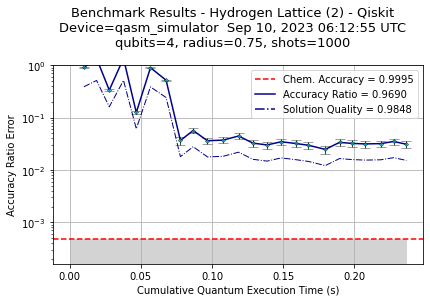

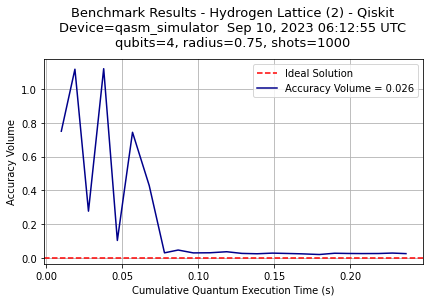

----- Line Plots for the 6 qubit group -----


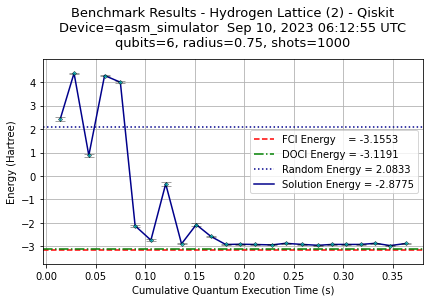

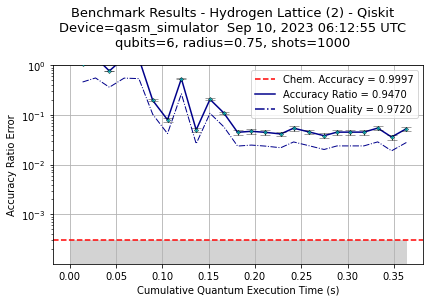

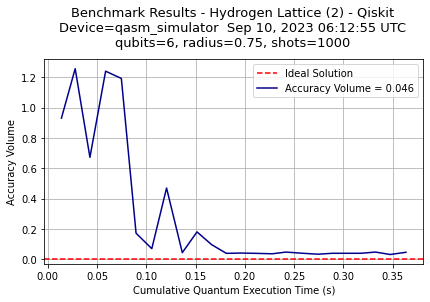

----- Line Plots for the 8 qubit group -----


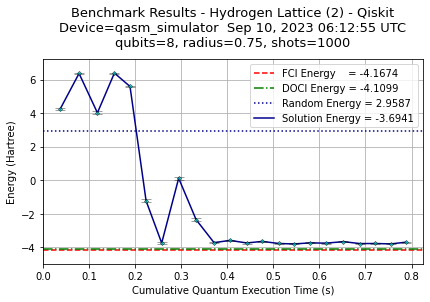

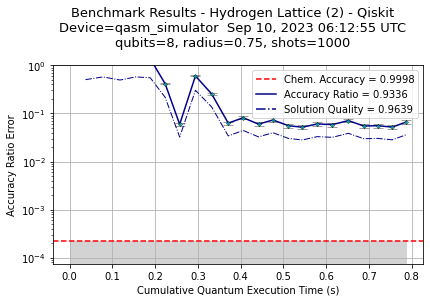

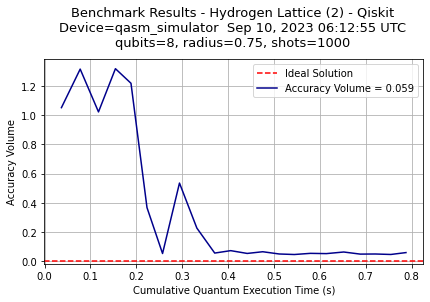

----- Line Plots for the 10 qubit group -----


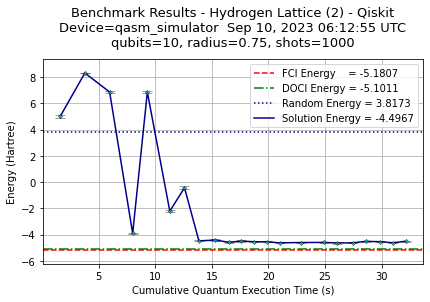

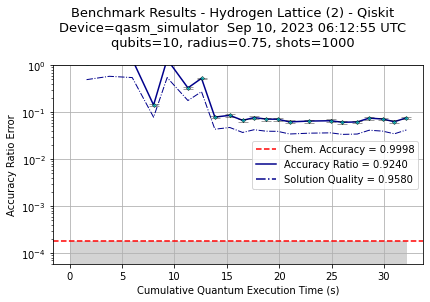

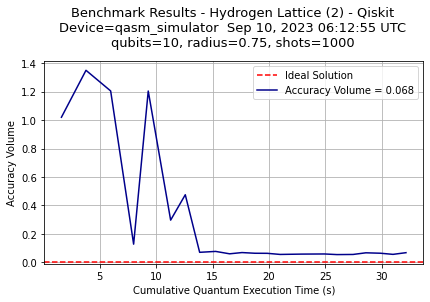

----- Line Plots for the 12 qubit group -----


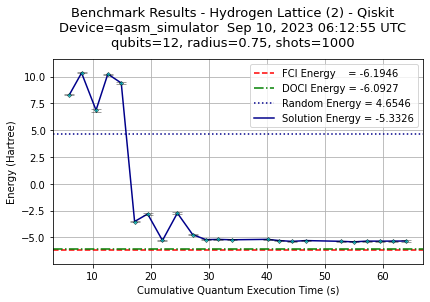

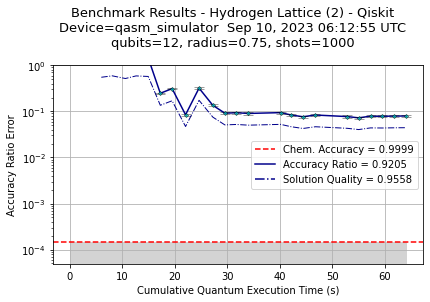

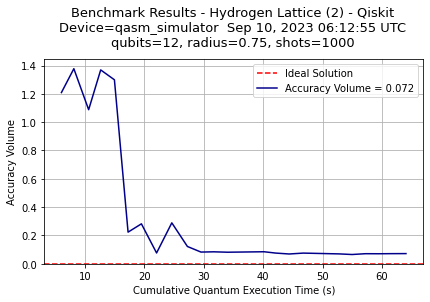

----- Line Plots for the 14 qubit group -----


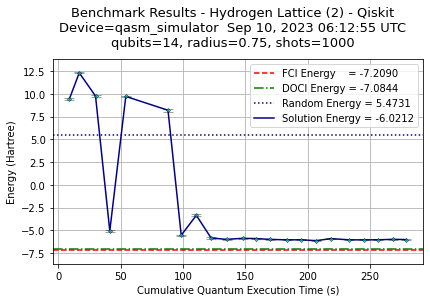

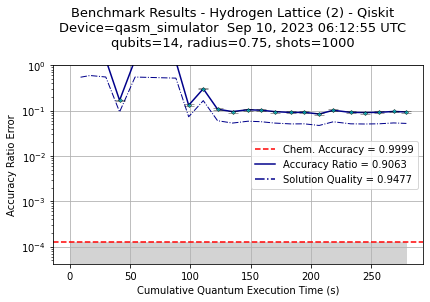

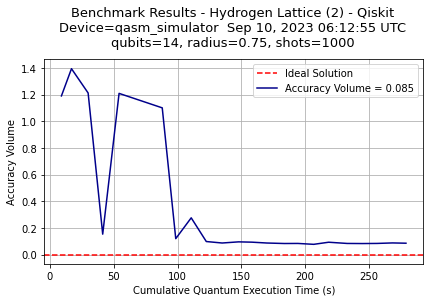

----- Line Plots for the 16 qubit group -----


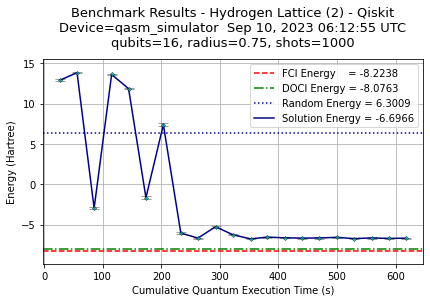

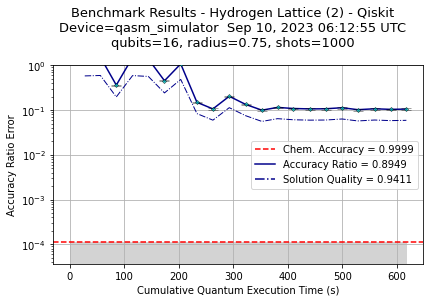

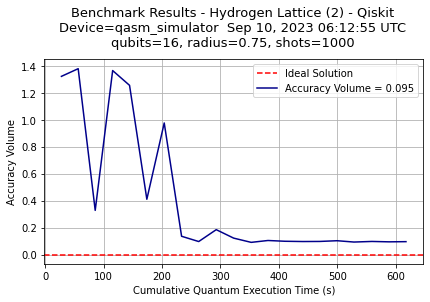

----- Cumulative Plots for all qubit groups -----


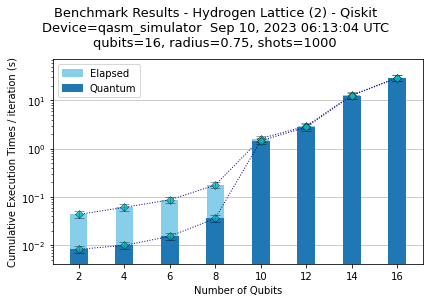

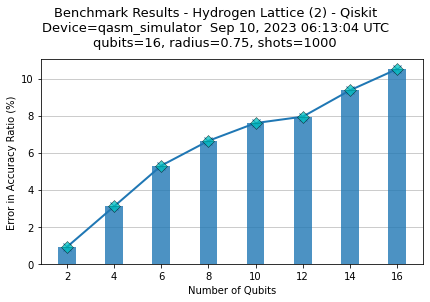

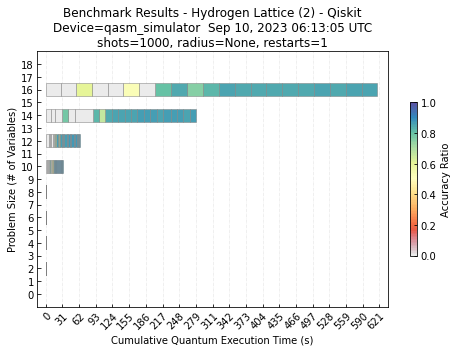

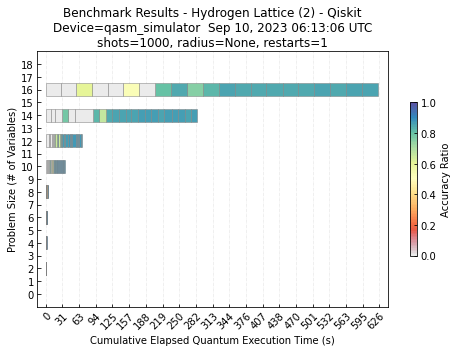

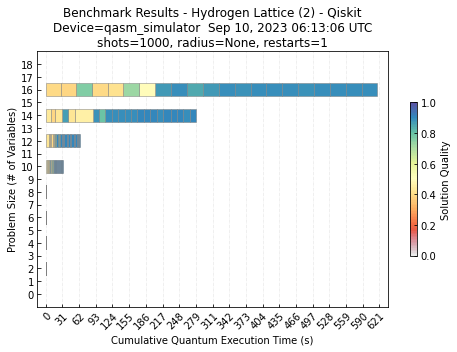

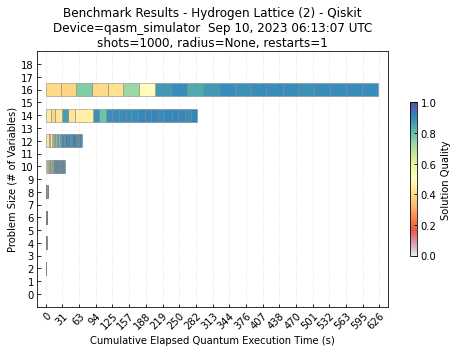

In [3]:
import os, hydrogen_lattice_benchmark

backend_id="qasm_simulator"
#backend_id="BlueQubit-CPU"
# backend_id="ibm_brisbane-230811-ma"
# backend_id="ibmq_guadalupe-230731-res-0"
# backend_id="ibmq_guadalupe-230823"

# Additional arguments specific to Hydrogen Lattice benchmark method 2 plotting
hl_app_args = dict(
    
    # display options for line plots (pairwise)
    line_y_metrics=['energy', 'accuracy_ratio_error', 'accuracy_volume'],             # + 'solution_quality', 'accuracy_ratio', 'solution_quality_error'
    #line_x_metrics=['iteration_count', 'cumulative_exec_time'],    # + 'cumulative_elapsed_time'
    line_x_metrics=['cumulative_exec_time', 'cumulative_exec_time', 'cumulative_exec_time'],    # + 'cumulative_elapsed_time'
    plot_layout_style='individual',                                      # plot layout, can be 'grid', 'stacked', or 'individual'
    show_elapsed_times= True,                                      # in exec times bar plot, include elapsed times
    use_logscale_for_times=True,                                  # in exec times bar plot, use log scale
    
    # display options for area plots (multiplicative)
    score_metric=['accuracy_ratio', 'solution_quality'],
    x_metric=['cumulative_exec_time', 'cumulative_elapsed_time'],  # + 'cumulative_opt_exec_time', 
)

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''), backend_id=backend_id,                                             
    **hl_app_args)


### Hydrogen Lattice - Method 2 - Use Custom Minimizer Function

This example shows how to configure a custom minimizer function for use in this benchmark.


In [ ]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# define a custom Nelder-Mead minimizer function
from scipy.optimize import minimize

tol=0.01
max_iter=30

def my_minimizer(objective_function, initial_parameters, callback):

    ret = minimize(objective_function,
        x0=initial_parameters, 

        
        # a custom minimizer 
        method='nelder-mead',
        options={'xatol':tol, 'fatol':tol, 'maxiter': max_iter, 'maxfev': max_iter, 'disp': False},
                   
        callback=callback) 
    
    print(f"\n... my_minimizer completed, return = \n{ret}")
    return ret

# Additional arguments specific to Hydrogen Lattice benchmark method 2
hl_app_args = dict(   

    max_iter=30,                # maximum minimizer iterations to perform
    comfort=True,               # show 'comfort dots' during execution
   
    minimizer_function=my_minimizer,   # use custom minimizer function
)

# Run the benchmark in method 2
hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args
)

### Hydrogen Lattice - Execute Objective Function

This example shows how to perform a single execution of the objective function to obtain the energy computed for a specific set of parameters.


In [ ]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark
hydrogen_lattice_benchmark.verbose=True

# Define a function to perform one iteration of the objective function
def run_objective_function(num_qubits=2, **kwargs)

    # Arguments required to execute of single instance
    hl_single_args = dict(

        max_iter=1,                 # maximum minimizer iterations to perform

        parameterized=False,        # use Parameter objects in circuit and cache transpiled circuits
        parameter_mode=2,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    )
    # Run the benchmark in method 2
    hydrogen_lattice_benchmark.run(
        min_qubits=num_qubits, max_qubits=num_qubits, max_circuits=max_circuits, num_shots=num_shots,
        method=2, 
        backend_id=backend_id, provider_backend=provider_backend,
        hub=hub, group=group, project=project, exec_options=exec_options,
        **hl_single_args, **kwargs)

    
# Arguments specific to execution of single instance of the Hydrogen Lattice objective function
hl_app_args = dict(

    num_qubits=2,               # problem size, dexscribed by number of qubits
    radius=None,                # select single problem radius, None = use first radius
    num_shots=1000,             # number of shots to perform
    
    parameter_mode=2,           # 1 - use single theta parameter, 2 - map multiple thetas to pairs
    thetas_array=[ 0.0 ],       # use custom thetas_array
)

# Execute the objective function once with the given arguments
retdata = run_objective_function(**hl_app_args)
print(retdata)
